In [ ]:
# Clone the Darknet repository
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.35 MiB | 12.90 MiB/s, done.
Resolving deltas: 100% (10670/10670), done.


In [ ]:
# Change directory to darknet
%cd darknet

/content/darknet


In [ ]:
# Change makefile to have GPU and OpenCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# Compile Darknet
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download pre-trained weights for YOLOv3
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-04-05 17:02:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  52.1MB/s    in 5.3s    

2024-04-05 17:02:20 (44.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# Function to upload files to Colab
def upload_files():
    from google.colab import files
    uploaded = files.upload()
    for name, data in uploaded.items():
        with open(name, 'wb') as f:
            f.write(data)
    return list(uploaded.keys())

In [ ]:
# Upload your custom dataset as a zip file
upload_files()

Saving dataset_1.zip to dataset_1.zip


['dataset_1.zip']

In [ ]:
# Unzip the dataset
import zipfile
with zipfile.ZipFile('dataset_1.zip', 'r') as zip_ref:
    zip_ref.extractall('data/obj')

In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt

images_dir = "/content/darknet/data/obj/dataset_1/images/"
labels_dir = "/content/darknet/data/obj/dataset_1/yolo_labels/"

In [ ]:
for label_file in os.listdir(labels_dir):
    label_path = os.path.join(labels_dir, label_file)
    new_label_path = os.path.join(images_dir, label_file)
    shutil.copy(label_path, new_label_path)

/content/darknet/data/obj/dataset_1/images/030R.jpg
/content/darknet/data/obj/dataset_1/images/030R.txt


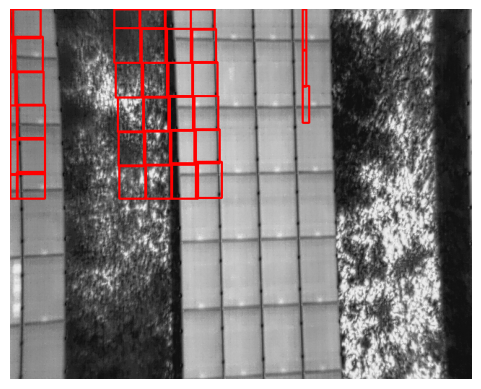

/content/darknet/data/obj/dataset_1/images/112R.jpg
/content/darknet/data/obj/dataset_1/images/112R.txt


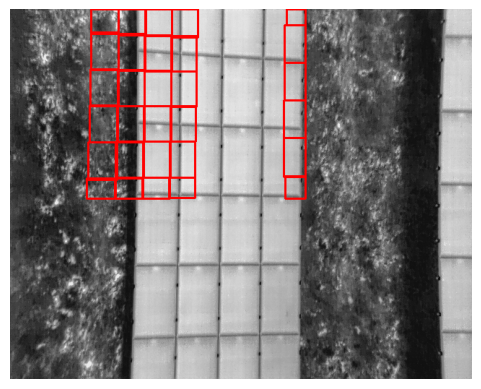

/content/darknet/data/obj/dataset_1/images/047R.jpg
/content/darknet/data/obj/dataset_1/images/047R.txt


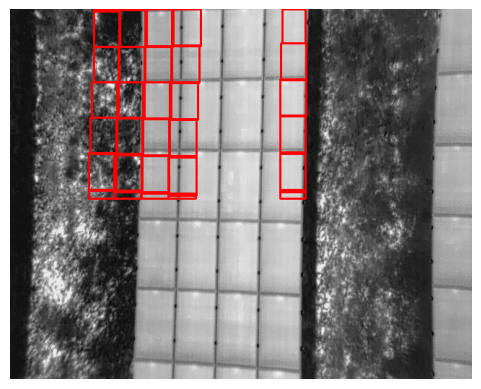

/content/darknet/data/obj/dataset_1/images/024R.jpg
/content/darknet/data/obj/dataset_1/images/024R.txt


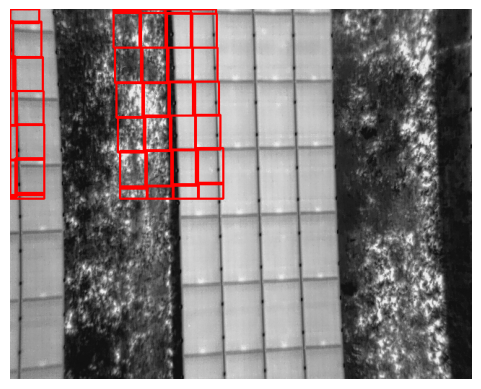

/content/darknet/data/obj/dataset_1/images/036R.jpg
/content/darknet/data/obj/dataset_1/images/036R.txt


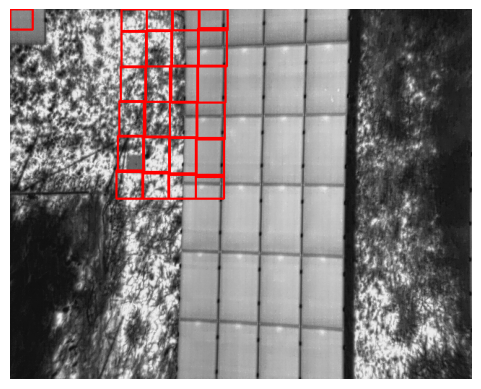

/content/darknet/data/obj/dataset_1/images/042R.jpg
/content/darknet/data/obj/dataset_1/images/042R.txt


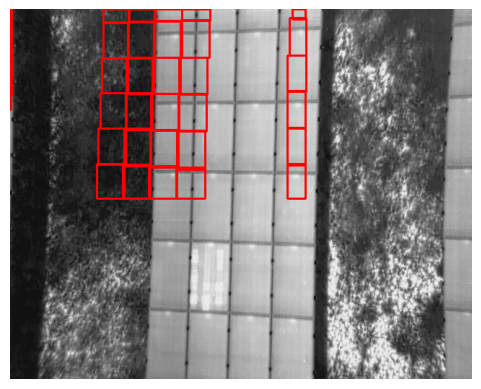

/content/darknet/data/obj/dataset_1/images/031R.jpg
/content/darknet/data/obj/dataset_1/images/031R.txt


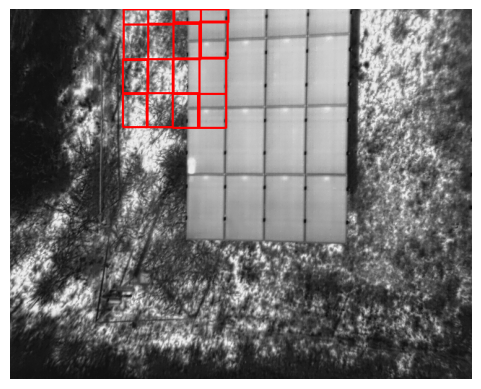

/content/darknet/data/obj/dataset_1/images/097R.jpg
/content/darknet/data/obj/dataset_1/images/097R.txt


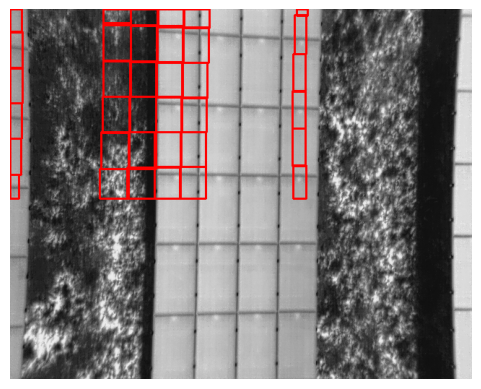

/content/darknet/data/obj/dataset_1/images/040R.jpg
/content/darknet/data/obj/dataset_1/images/040R.txt


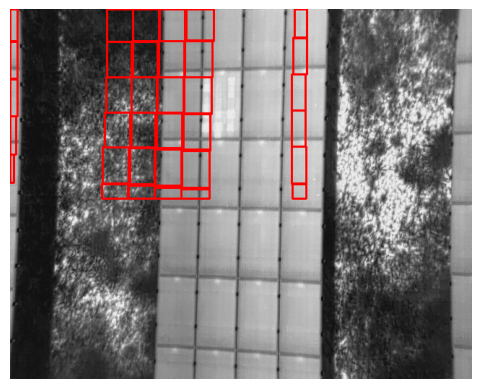

/content/darknet/data/obj/dataset_1/images/085R.jpg
/content/darknet/data/obj/dataset_1/images/085R.txt


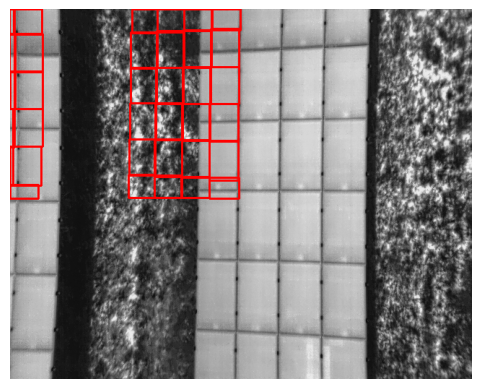

/content/darknet/data/obj/dataset_1/images/044R.jpg
/content/darknet/data/obj/dataset_1/images/044R.txt


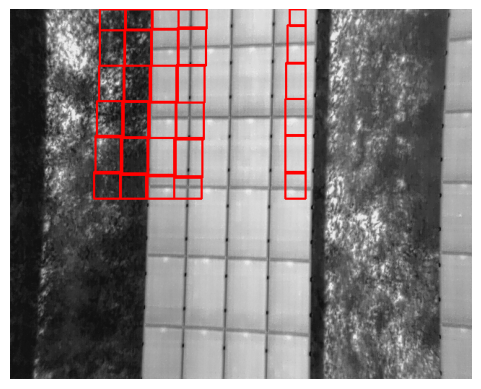

/content/darknet/data/obj/dataset_1/images/039R.jpg
/content/darknet/data/obj/dataset_1/images/039R.txt


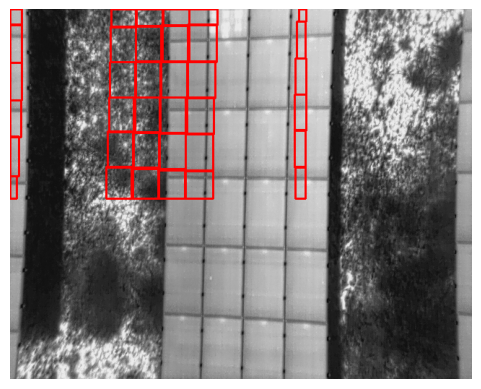

/content/darknet/data/obj/dataset_1/images/013R.jpg
/content/darknet/data/obj/dataset_1/images/013R.txt


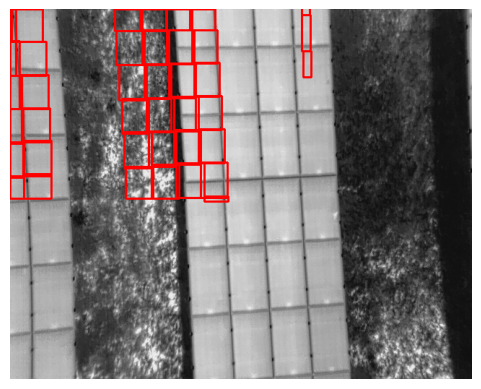

/content/darknet/data/obj/dataset_1/images/027R.jpg
/content/darknet/data/obj/dataset_1/images/027R.txt


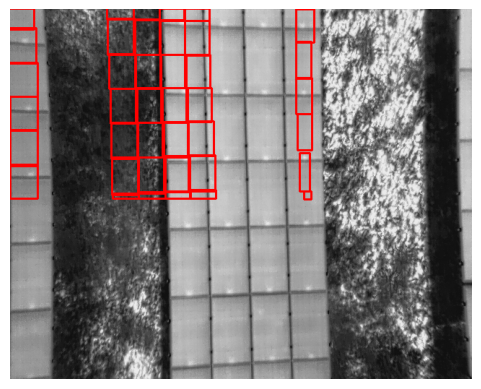

/content/darknet/data/obj/dataset_1/images/066R.jpg
/content/darknet/data/obj/dataset_1/images/066R.txt


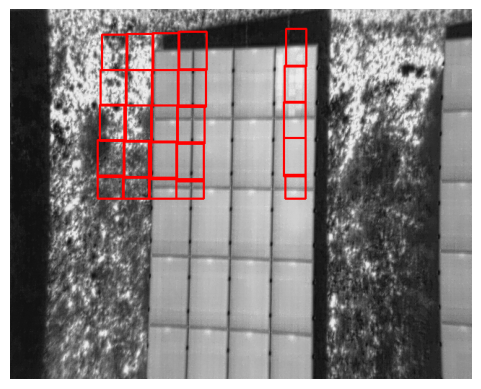

/content/darknet/data/obj/dataset_1/images/074R.jpg
/content/darknet/data/obj/dataset_1/images/074R.txt


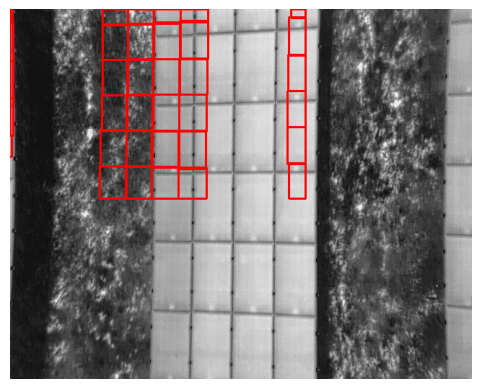

/content/darknet/data/obj/dataset_1/images/087R.jpg
/content/darknet/data/obj/dataset_1/images/087R.txt


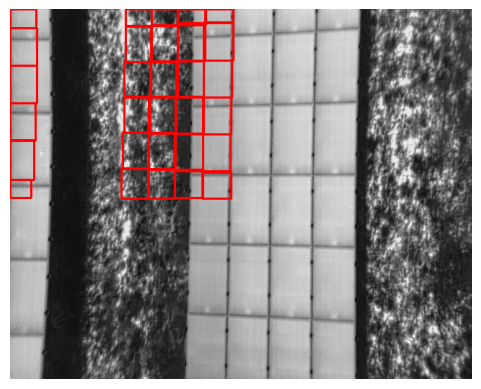

/content/darknet/data/obj/dataset_1/images/091R.jpg
/content/darknet/data/obj/dataset_1/images/091R.txt


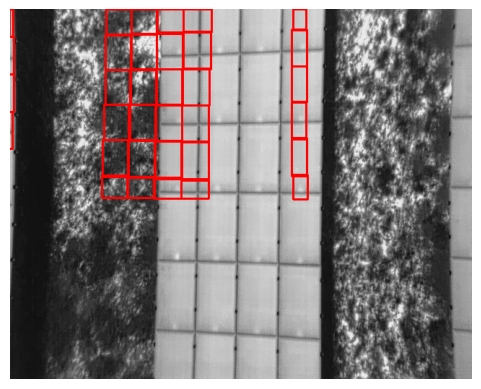

/content/darknet/data/obj/dataset_1/images/057R.jpg
/content/darknet/data/obj/dataset_1/images/057R.txt


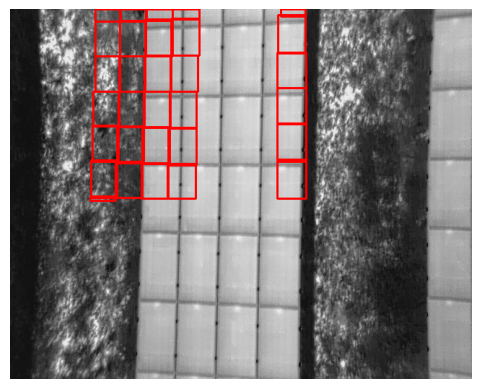

/content/darknet/data/obj/dataset_1/images/092R.jpg
/content/darknet/data/obj/dataset_1/images/092R.txt


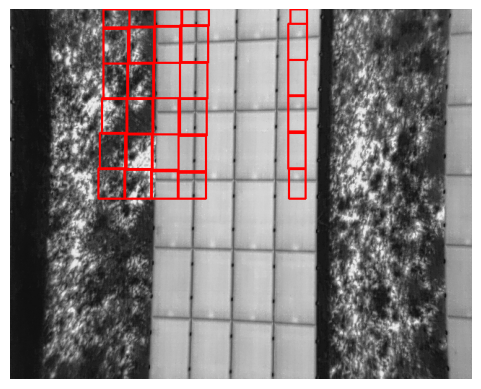

/content/darknet/data/obj/dataset_1/images/067R.jpg
/content/darknet/data/obj/dataset_1/images/067R.txt


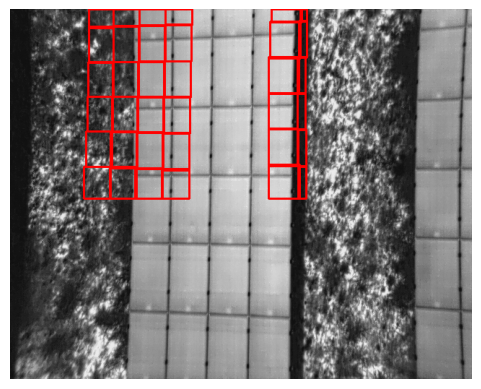

/content/darknet/data/obj/dataset_1/images/098R.jpg
/content/darknet/data/obj/dataset_1/images/098R.txt


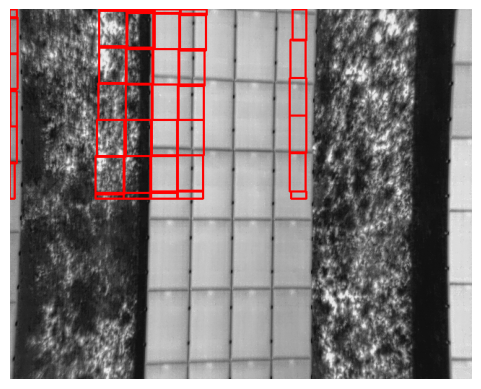

/content/darknet/data/obj/dataset_1/images/006R.jpg
/content/darknet/data/obj/dataset_1/images/006R.txt


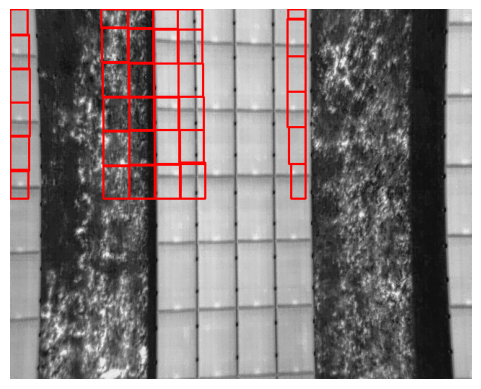

/content/darknet/data/obj/dataset_1/images/059R.jpg
/content/darknet/data/obj/dataset_1/images/059R.txt


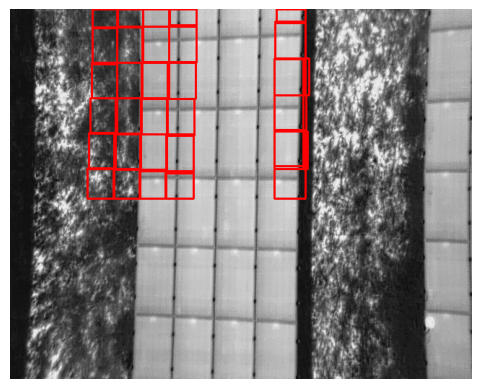

/content/darknet/data/obj/dataset_1/images/094R.jpg
/content/darknet/data/obj/dataset_1/images/094R.txt


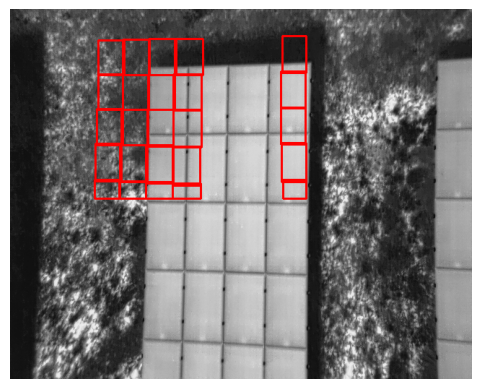

In [ ]:
# Read images and corresponding labels
image_files = os.listdir(images_dir)
label_files = os.listdir(labels_dir)

# Visualize sample images with bounding boxes
for image_file in image_files[:50]:
    if image_file.endswith(".jpg"):
      image_path = os.path.join(images_dir, image_file)
      label_path = os.path.splitext(image_path)[0] + ".txt"

      image = cv2.imread(image_path)
      # print(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # Read and parse YOLO label file
      with open(label_path, 'r') as f:
          labels = f.readlines()

      for label in labels:
          class_id, x_center, y_center, width, height = map(float, label.strip().split())
          # Convert YOLO format to xmin, ymin, xmax, ymax
          xmin = int((x_center - width / 2) * image.shape[1])
          ymin = int((y_center - height / 2) * image.shape[0])
          xmax = int((x_center + width / 2) * image.shape[1])
          ymax = int((y_center + height / 2) * image.shape[0])
          # Draw bounding box
          cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

      plt.imshow(image)
      plt.axis('off')
      print(image_path)
      print(label_path)
      plt.show()

In [ ]:
# Create obj.names file
!echo "0" > data/obj.names

In [ ]:
# Create obj.data file
!echo -e 'classes = 1\ntrain = data/train.txt\nvalid = data/test.txt\nnames = data/obj.names\nbackup = /content/drive/MyDrive/darknet/backup' > data/obj.data

In [ ]:
# Generate train.txt file
import glob
import os

In [ ]:
import os

def replace_class_id(annotation_dir):
    for filename in os.listdir(annotation_dir):
        if filename.endswith(".txt"):
            filepath = os.path.join(annotation_dir, filename)
            with open(filepath, "r") as file:
                lines = file.readlines()
            with open(filepath, "w") as file:
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) > 0:
                        class_id = int(parts[0])
                        if class_id == 1:
                            parts[0] = "0"
                        new_line = " ".join(parts) + "\n"
                        file.write(new_line)

# Replace class ID 1 with 0 in annotation files within the specified directory
replace_class_id("data/obj/dataset_1/images")

In [ ]:
image_files = []
for filename in glob.iglob('data/obj/**/*.jpg', recursive=True):
    image_files.append(filename)

with open('data/train.txt', 'w') as f:
    f.write('\n'.join(image_files))

In [ ]:
# Download pre-trained YOLOv3 configuration file
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -P cfg

--2024-04-05 17:43:38--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘cfg/yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-04-05 17:43:38 (73.2 MB/s) - ‘cfg/yolov3.cfg.1’ saved [8342/8342]



In [ ]:
# Modify the configuration file
!sed -i 's/batch=1/batch=64/' cfg/yolov3.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3.cfg
!sed -i 's/max_batches = 500200/max_batches = 6000/' cfg/yolov3.cfg
!sed -i 's/steps=400000,450000/steps=4800,5400/' cfg/yolov3.cfg
!sed -i 's/classes=80/classes=1/' cfg/yolov3.cfg
!sed -i 's/filters=255/filters=18/' cfg/yolov3.cfg

In [ ]:
# Start training
!./darknet detector train data/obj.data cfg/yolov3.cfg yolov3.weights -dont_show

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
yolov3
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Lay

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3.cfg yolov3.weights -dont_show -epochs 10 > training_log.txt

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 B

In [ ]:
# Run YOLOv3 inference on the single image
!./darknet detector test data/obj.data cfg/yolov3.cfg /content/drive/MyDrive/darknet/backup/yolov3_final.weights /content/darknet/data/obj/dataset_1/images/002R.jpg -dont_show -ext_output


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3.cfg /content/drive/MyDrive/darknet/backup/yolov3_final.weights /content/darknet/data/obj/dataset_1/images/002R.jpg -ext_output

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
!./darknet detect cfg/yolov3.cfg /content/drive/MyDrive/darknet/backup/yolov3_final.weights /content/darknet/data/obj/dataset_1/images/006R.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 